## Visualization of dataset (Task 1)

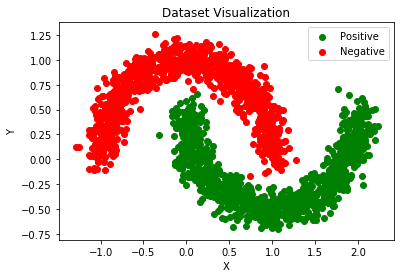

In [136]:
#import library
import numpy as np
import matplotlib.pyplot as plt
#get moon dataset
from sklearn.datasets import make_moons
#take 2000 samples of data
X, y = make_moons(n_samples=2000, noise=0.1)

################################################### DATA VISUALIZATION #####################################################
# Positive Data Points 
x_pos = np.array([X[i] for i in range(len(X)) 
                                    if y[i] == 1]) 
# Negative Data Points 
x_neg = np.array([X[i] for i in range(len(X))  
                                    if y[i] == 0]) 
# Plotting the Positive Data Points 
plt.scatter(x_pos[:, 0], x_pos[:, 1], color = 'green', label = 'Positive') 
# Plotting the Negative Data Points 
plt.scatter(x_neg[:, 0], x_neg[:, 1], color = 'red', label = 'Negative') 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset Visualization')
plt.legend()
plt.show()


## Logistic Regression From scratch (Task 2)

In [137]:
#To add weight bias 0, adding one more dimension
temp = np.ones((X.shape[0], X.shape[1] + 1))
temp[:, 1:] = X
X = temp
########################### SPLITTING DATASET INTO TRAINING< VALIDATION, TESTING DATASET ###################################
X_train = X[:1000]
X_val = X[1001:1500]
X_test=X[1501:]

y_train = y[:1000]
y_val = y[1001:1500]
y_test=y[1501:]

############################################### PREPROCESSING DATA ########################################################
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)
print('Done')

Done


In [138]:
#define weights , learning rate, batch size and iterations
weights = np.zeros(X.shape[1]).reshape(1, -1) 
lr = 0.1
batch_size = 100
n_iterations = 100

# sigmoid function for binary classification
sigmoid = lambda z : 1 / (1 + np.exp(-z))
#cross entropy loss function
logloss = lambda y_hat, y : np.sum(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / len(y_hat)

#################################################### DEFINE FUNCTIONS ###############################################
#gradient descent function
def gradient_descent(X, y, weights, lr):
    y = y.reshape(-1, 1)
    #calculate the gradients and update the weights
    gradients = np.dot(X.T, sigmoid(np.dot(X, weights.T)) - y) / len(y)
    new_weights = weights - lr * gradients.T
    return new_weights

#to shuffle the data 
from sklearn.utils import shuffle
#create mini-batches
def prepare_batches(X, y, batch_size):
    X_batch_list = list()
    y_batch_list = list()
    
    # Randomly shuffle the data
    X, y = shuffle(X, y)
    #creating batch for features and labels
    for i in range(len(y) // batch_size):
        X_batch_list.append(X[i * batch_size : i * batch_size + batch_size, :])
        y_batch_list.append(y[i * batch_size : i * batch_size + batch_size])
    
    if len(y) % batch_size > 0:
        X_batch_list.append(X[len(y) // batch_size * batch_size:, :])
        y_batch_list.append(y[len(y) // batch_size * batch_size:])

    return X_batch_list, y_batch_list

#defining predict function, check the probability, if > 0.5 then class-1 else class-0
predict_with_output = lambda X: (X > .5) * 1

In [139]:
############################################## TRAIN THE MODEL #########################################################
#run the loop
for j in range(0,n_iterations):
    #prepare the mini-batch
    X_batch_list, y_batch_list = prepare_batches(X_train, y_train, batch_size)
    n_batches = len(y_batch_list)
    for i in range(n_batches):
        #for each batch
        X_batch = X_batch_list[i]
        y_batch = y_batch_list[i]
        #calculate gradient and update weights
        weights = gradient_descent(X_batch, y_batch, weights, lr)
        #get the probability
        y_hat = sigmoid(np.dot(X_batch, weights.T))
        #calculate the cross entropy loss
        loss=logloss(y_hat, y_batch) / len(y_batch)
        #train_error_hist.append(loss)
        #predict the output and calculate the accuracy by matching the output with the labels
        accuracy=np.mean((predict_with_output(y_hat) == y_batch.reshape(-1, 1)) * 1)
        #train_acc_hist.append(accuracy)
    
    print('Epoch: ' , j, '\t Loss: ', format(loss, '.8f'), '\t Accuracy: ', accuracy * 100 )
        
#################################### CALCULATE LOSS AND ACCURACY ON TRAINING DATASET ##########################################
#get the probabilities
y_hat = sigmoid(np.dot(X_train, weights.T))
loss=logloss(y_hat, y_train) / len(y_train)
print("Loss on Training Dataset: ",loss)
accuracy=np.mean((predict_with_output(y_hat) == y_train.reshape(-1, 1)) * 1)
print("Accuracy on Training Dataset: ", accuracy*100)

#################################### CALCULATE LOSS AND ACCURACY ON VALIDATION DATASET ########################################
y_hat1 = sigmoid(np.dot(X_val, weights.T))
loss=logloss(y_hat1, y_val) / len(y_val)
print("Loss on Validation Dataset: ",loss)
accuracy=np.mean((predict_with_output(y_hat1) == y_val.reshape(-1, 1)) * 1)
print("Accuracy on Validation Dataset: ", accuracy*100)

#################################### CALCULATE LOSS AND ACCURACY ON TESTING DATASET ###########################################
y_hat2 = sigmoid(np.dot(X_test, weights.T))
loss=logloss(y_hat2, y_test) / len(y_test)
print("Loss on Testing Dataset: ",loss)
accuracy=np.mean((predict_with_output(y_hat2) == y_test.reshape(-1, 1)) * 1)
print("Accuracy on Testing Dataset: ", accuracy*100)



Epoch:  0 	 Loss:  0.72226089 	 Accuracy:  91.0
Epoch:  1 	 Loss:  0.77543681 	 Accuracy:  89.0
Epoch:  2 	 Loss:  0.86252214 	 Accuracy:  92.0
Epoch:  3 	 Loss:  0.88141321 	 Accuracy:  86.0
Epoch:  4 	 Loss:  0.91555555 	 Accuracy:  84.0
Epoch:  5 	 Loss:  0.98153513 	 Accuracy:  89.0
Epoch:  6 	 Loss:  0.99045003 	 Accuracy:  86.0
Epoch:  7 	 Loss:  1.05301567 	 Accuracy:  87.0
Epoch:  8 	 Loss:  1.05986668 	 Accuracy:  85.0
Epoch:  9 	 Loss:  1.11985495 	 Accuracy:  86.0
Epoch:  10 	 Loss:  1.12758720 	 Accuracy:  89.0
Epoch:  11 	 Loss:  1.12953235 	 Accuracy:  88.0
Epoch:  12 	 Loss:  1.10961924 	 Accuracy:  89.0
Epoch:  13 	 Loss:  1.25316172 	 Accuracy:  84.0
Epoch:  14 	 Loss:  1.25685548 	 Accuracy:  85.0
Epoch:  15 	 Loss:  1.22096642 	 Accuracy:  85.0
Epoch:  16 	 Loss:  1.17071224 	 Accuracy:  89.0
Epoch:  17 	 Loss:  1.25768611 	 Accuracy:  86.0
Epoch:  18 	 Loss:  1.30622875 	 Accuracy:  91.0
Epoch:  19 	 Loss:  1.24398415 	 Accuracy:  83.0
Epoch:  20 	 Loss:  1.23824001

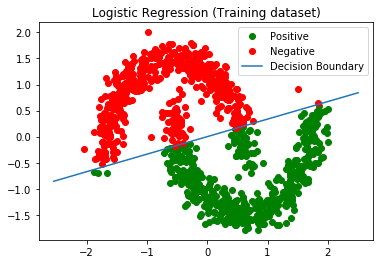

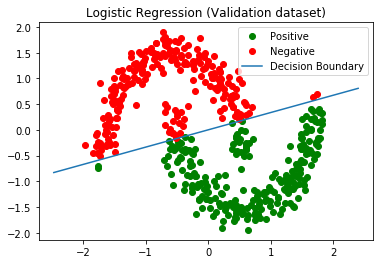

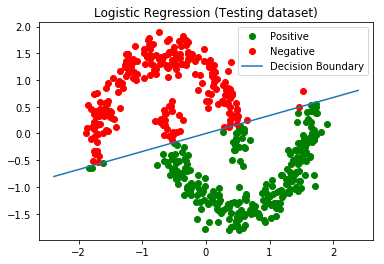

In [140]:
#################################### PLOTTING DECISION BOUNDARY ON TRAINING DATASET ###########################################
#get the class-1 if probability >0.5  or class-0 if probability <0.5
y_pred = (y_hat >=0.5 )
# a 1D array rather than a column vector
y_pred_idx = y_pred.reshape(-1) 
#plot data depending on class-1 (Positive) or class-0(Negative)
plt.plot(X_train[y_pred_idx, 1], X_train[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_train[~y_pred_idx, 1], X_train[~y_pred_idx, 2], 'ro', label="Negative")
#get min and max of training data to plot for X-axis
#adding 0.5 to make decision boundary line longer on the plot
x_values = [np.min(X_train[:, 1] -0.5), np.max(X_train[:, 2]+0.5 )]
#get weighted sum of inputs for decision boundary
y_values = - (weights[0][0] + np.dot(weights[0][1], x_values)) / weights[0][2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression (Training dataset)')
plt.show()
################################## PLOTTING DECISION BOUNDARY ON VALIDATION DATASET ###########################################
y_pred = (y_hat1 >=0.5 )
y_pred_idx = y_pred.reshape(-1) 
plt.plot(X_val[y_pred_idx, 1], X_val[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_val[~y_pred_idx, 1], X_val[~y_pred_idx, 2], 'ro', label="Negative")

x_values = [np.min(X_val[:, 1] -0.5), np.max(X_val[:, 2]+0.5 )]
y_values = - (weights[0][0] + np.dot(weights[0][1], x_values)) / weights[0][2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression (Validation dataset)')
plt.show()

#################################### PLOTTING DECISION BOUNDARY ON TESTING DATASET ###########################################
y_pred = (y_hat2 >=0.5 )
y_pred_idx = y_pred.reshape(-1)
plt.plot(X_test[y_pred_idx, 1], X_test[y_pred_idx, 2], 'go', label="Positive")
plt.plot(X_test[~y_pred_idx, 1], X_test[~y_pred_idx, 2], 'ro', label="Negative")

x_values = [np.min(X_test[:, 1] -0.5), np.max(X_test[:, 2]+0.5 )]
y_values = - (weights[0][0] + np.dot(weights[0][1], x_values)) / weights[0][2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.legend()
plt.title('Logistic Regression (Testing dataset)')
plt.show()